In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy import stats

In [3]:
# Cargar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Crear DataFrame
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df['species'] = [target_names[i] for i in y]



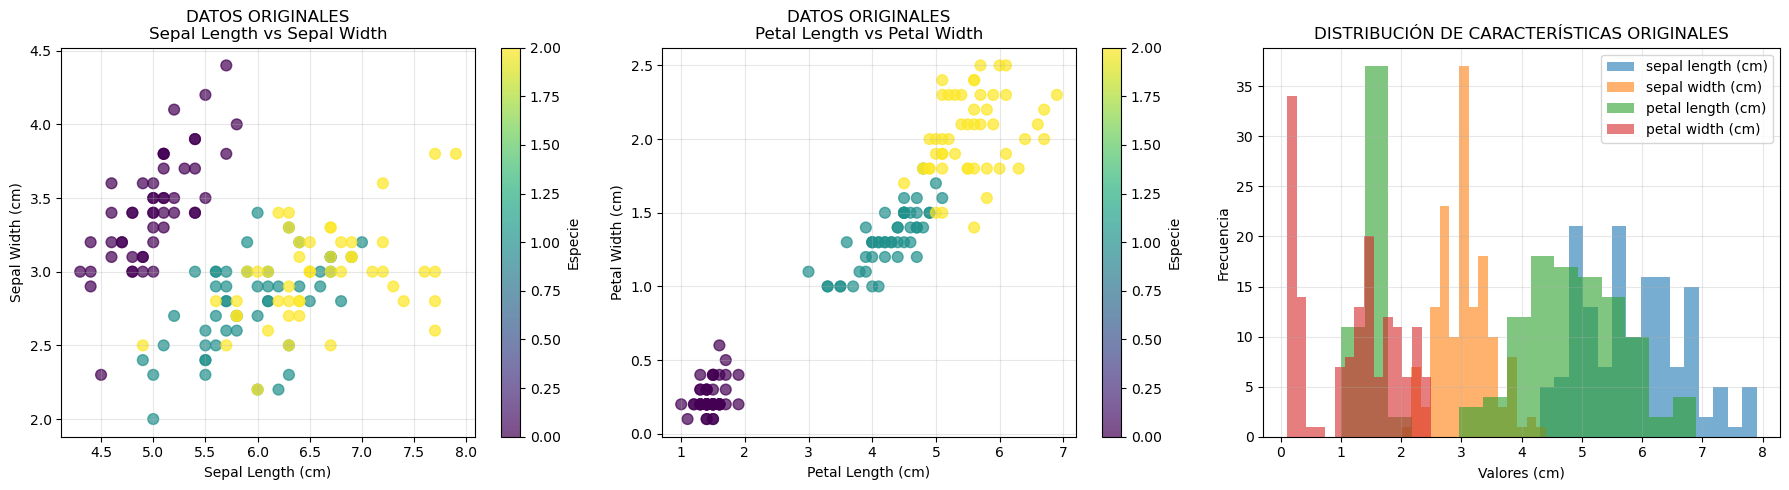


🔧 PREPROCESAMIENTO DE DATOS
✅ Datos estandarizados (media=0, varianza=1)
   Media después de estandarizar: [-0. -0. -0. -0.]
   Desviación estándar: [1. 1. 1. 1.]


In [5]:
plt.figure(figsize=(18, 5))

# Gráfica 1: Datos originales en espacio 2D
plt.subplot(1, 3, 1)
scatter = plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], 
                     c=iris_df['target'], cmap='viridis', alpha=0.7, s=60)
plt.colorbar(scatter, label='Especie')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('DATOS ORIGINALES\nSepal Length vs Sepal Width')
plt.grid(True, alpha=0.3)

# Gráfica 2: Otra perspectiva
plt.subplot(1, 3, 2)
scatter = plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], 
                     c=iris_df['target'], cmap='viridis', alpha=0.7, s=60)
plt.colorbar(scatter, label='Especie')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('DATOS ORIGINALES\nPetal Length vs Petal Width')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Preprocesamiento de datos

# Estandarizar datos (importante para ICA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


🔬 EXPERIMENTO 1: FastICA con 2 Componentes Independientes
📊 Resultados FastICA 2 componentes:
   Forma de componentes: (150, 2)
   Número de iteraciones: 2


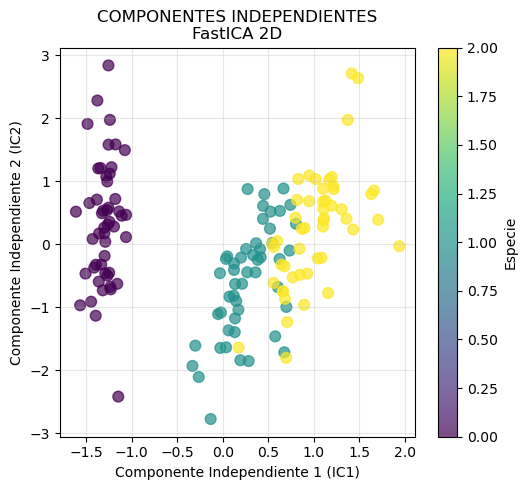

In [9]:
print("\n" + "="*60)
print("🔬 EXPERIMENTO 1: FastICA con 2 Componentes Independientes")
print("="*60)

# Aplicar FastICA con 2 componentes
ica_2 = FastICA(n_components=2, random_state=42, max_iter=1000)
X_ica_2 = ica_2.fit_transform(X_scaled)

print("📊 Resultados FastICA 2 componentes:")
print(f"   Forma de componentes: {X_ica_2.shape}")
print(f"   Número de iteraciones: {ica_2.n_iter_}")

# Crear DataFrame con componentes ICA
ica_df_2 = pd.DataFrame(X_ica_2, columns=['IC1', 'IC2'])
ica_df_2['target'] = y
ica_df_2['species'] = [target_names[i] for i in y]

# Visualización de componentes ICA
plt.figure(figsize=(15, 5))

# Gráfica 1: Componentes ICA
plt.subplot(1, 3, 1)
scatter = plt.scatter(ica_df_2['IC1'], ica_df_2['IC2'], 
                     c=ica_df_2['target'], cmap='viridis', alpha=0.7, s=60)
plt.colorbar(scatter, label='Especie')
plt.xlabel('Componente Independiente 1 (IC1)')
plt.ylabel('Componente Independiente 2 (IC2)')
plt.title('COMPONENTES INDEPENDIENTES\nFastICA 2D')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
